In [124]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

con = sqlite3.connect('./bench.db')
cur = con.cursor()
df = pd.read_sql_query("SELECT * from scanned", con)

In [125]:
# Mark the packages as malicious
df['malicious'] = np.nan
df['malicious'] = df['malicious'].astype(bool)
df.loc[df['source'] == 'malregistry', 'malicious'] = True
df.loc[df['source'] == 'random', 'malicious'] = False
df.loc[df['source'] == 'datadog', 'malicious'] = True
df.loc[df['source'] == 'downloaded', 'malicious'] = False
df.loc[df['source'] == 'dependents', 'malicious'] = False

In [126]:
df['new_package'] = df[df['source'] == 'datadog']['package'].str.extract('\d{4}-\d{2}-\d{2}-(.*)-v.*')
df['new_package'] = df['new_package'].fillna(df['package'])
df['package'] = df['new_package']
df = df.drop(columns=['new_package'])

df['new_package'] = df[df['source'] == 'datadog']['package'].str.extract('\d{4}-\d{2}-\d{2}-(.*).zip.*')
df['new_package'] = df['new_package'].fillna(df['package'])
df['package'] = df['new_package']
df = df.drop(columns=['new_package'])

df['new_version'] = df[df['source'] == 'datadog']['version'].str.extract('\d{4}-\d{2}-\d{2}-v(.*)\.zip.*')
df['new_version'] = df['new_version'].fillna(df['version'])
df['version'] = df['new_version']
df = df.drop(columns=['new_version'])

df.loc[df['version'].str.endswith('.out'), 'version'] = "0.0.0"

In [94]:
df = df.drop_duplicates(subset=['package', 'version', 'scanner'])

In [95]:
df['malicious'].value_counts() / 4

malicious
True     4019.0
False    2740.5
Name: count, dtype: float64

In [96]:
df['source'].value_counts() / 4

source
malregistry    2814.00
random         1398.25
datadog        1205.00
dependents      926.25
downloaded      416.00
Name: count, dtype: float64

In [128]:
df['scanner'].value_counts()

scanner
guarddog      7667
ossgadget     7667
pypi          7667
bandit4mal    7504
Name: count, dtype: int64

In [98]:
df['total_alert'] = df['severity_high'] + df['severity_medium'] + df['severity_low']

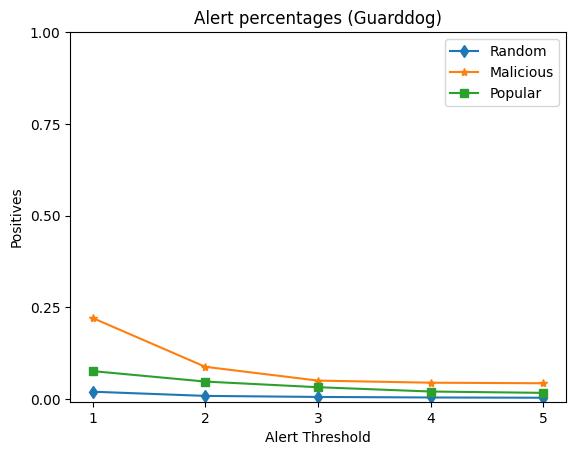

In [99]:
random_slice = df[(df['scanner'] == 'guarddog') & (df['source'] == 'random')]
benign_slice = df[(df['scanner'] == 'guarddog') & ((df['source'] == 'dependents') | (df['source'] == 'downloaded'))]
malicious_slice = df[(df['scanner'] == 'guarddog') & df['malicious']]

x = [1, 2, 3, 4, 5]

# Calculate percentages for each category
y_random_all = [
    len(random_slice[random_slice['total_alert'] > i]) / len(random_slice)
    for i in x
]

y_malicious_all = [
    len(malicious_slice[malicious_slice['total_alert'] > i]) / len(malicious_slice)
    for i in x
]

y_benign_all = [
    len(benign_slice[benign_slice['total_alert'] > i]) / len(benign_slice)
    for i in x
]

# Plotting
plt.plot(x, y_random_all, 'd-', label='Random')
plt.plot(x, y_malicious_all, '*-', label='Malicious')
plt.plot(x, y_benign_all, 's-', label='Popular')

# Adding labels and title
plt.xlabel('Alert Threshold')
plt.ylabel('Positives')
plt.title('Alert percentages (Guarddog)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

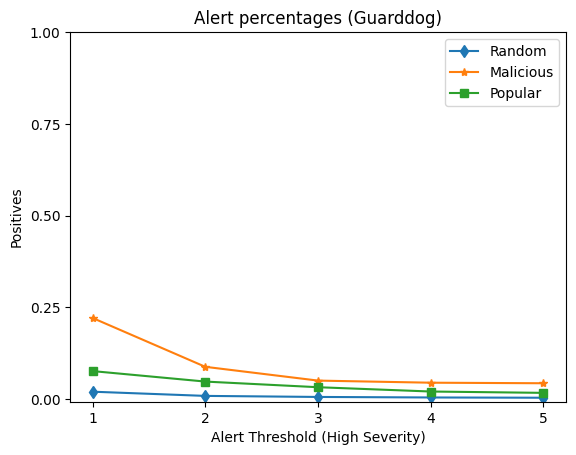

In [100]:
random_slice = df[(df['scanner'] == 'guarddog') & (df['source'] == 'random')]
benign_slice = df[(df['scanner'] == 'guarddog') & ((df['source'] == 'dependents') | (df['source'] == 'downloaded'))]
malicious_slice = df[(df['scanner'] == 'guarddog') & df['malicious']]

x = [1, 2, 3, 4, 5]

# Calculate percentages for each category
y_random_all = [
    len(random_slice[random_slice['severity_high'] > i]) / len(random_slice)
    for i in x
]

y_malicious_all = [
    len(malicious_slice[malicious_slice['severity_high'] > i]) / len(malicious_slice)
    for i in x
]

y_benign_all = [
    len(benign_slice[benign_slice['severity_high'] > i]) / len(benign_slice)
    for i in x
]

# Plotting
plt.plot(x, y_random_all, 'd-', label='Random')
plt.plot(x, y_malicious_all, '*-', label='Malicious')
plt.plot(x, y_benign_all, 's-', label='Popular')

# Adding labels and title
plt.xlabel('Alert Threshold (High Severity)')
plt.ylabel('Positives')
plt.title('Alert percentages (Guarddog)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

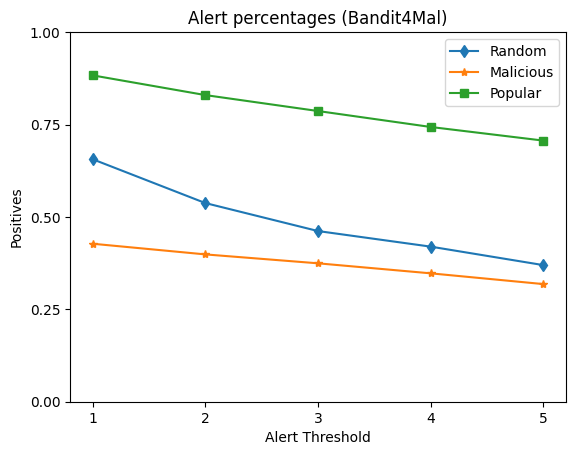

In [101]:
random_slice = df[(df['scanner'] == 'bandit4mal') & (df['source'] == 'random')]
benign_slice = df[(df['scanner'] == 'bandit4mal') & ((df['source'] == 'dependents') | (df['source'] == 'downloaded'))]
malicious_slice = df[(df['scanner'] == 'bandit4mal') & df['malicious']]

x = [1, 2, 3, 4, 5]

# Calculate percentages for each category
y_random_all = [
    len(random_slice[random_slice['total_alert'] > i]) / len(random_slice)
    for i in x
]

y_malicious_all = [
    len(malicious_slice[malicious_slice['total_alert'] > i]) / len(malicious_slice)
    for i in x
]

y_benign_all = [
    len(benign_slice[benign_slice['total_alert'] > i]) / len(benign_slice)
    for i in x
]

# Plotting
plt.plot(x, y_random_all, 'd-', label='Random')
plt.plot(x, y_malicious_all, '*-', label='Malicious')
plt.plot(x, y_benign_all, 's-', label='Popular')

# Adding labels and title
plt.xlabel('Alert Threshold')
plt.ylabel('Positives')
plt.title('Alert percentages (Bandit4Mal)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

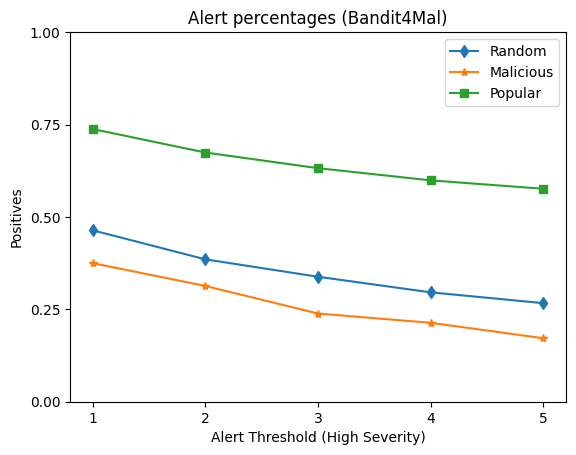

In [102]:
random_slice = df[(df['scanner'] == 'bandit4mal') & (df['source'] == 'random')]
benign_slice = df[(df['scanner'] == 'bandit4mal') & ((df['source'] == 'dependents') | (df['source'] == 'downloaded'))]
malicious_slice = df[(df['scanner'] == 'bandit4mal') & df['malicious']]

x = [1, 2, 3, 4, 5]

# Calculate percentages for each category
y_random_all = [
    len(random_slice[random_slice['severity_high'] > i]) / len(random_slice)
    for i in x
]

y_malicious_all = [
    len(malicious_slice[malicious_slice['severity_high'] > i]) / len(malicious_slice)
    for i in x
]

y_benign_all = [
    len(benign_slice[benign_slice['severity_high'] > i]) / len(benign_slice)
    for i in x
]

# Plotting
plt.plot(x, y_random_all, 'd-', label='Random')
plt.plot(x, y_malicious_all, '*-', label='Malicious')
plt.plot(x, y_benign_all, 's-', label='Popular')

# Adding labels and title
plt.xlabel('Alert Threshold (High Severity)')
plt.ylabel('Positives')
plt.title('Alert percentages (Bandit4Mal)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

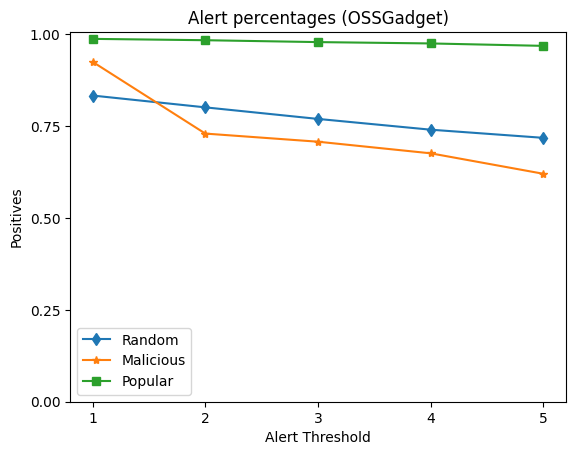

In [103]:
random_slice = df[(df['scanner'] == 'ossgadget') & (df['source'] == 'random')]
benign_slice = df[(df['scanner'] == 'ossgadget') & ((df['source'] == 'dependents') | (df['source'] == 'downloaded'))]
malicious_slice = df[(df['scanner'] == 'ossgadget') & df['malicious']]

x = [1, 2, 3, 4, 5]

# Calculate percentages for each category
y_random_all = [
    len(random_slice[random_slice['total_alert'] > i]) / len(random_slice)
    for i in x
]

y_malicious_all = [
    len(malicious_slice[malicious_slice['total_alert'] > i]) / len(malicious_slice)
    for i in x
]

y_benign_all = [
    len(benign_slice[benign_slice['total_alert'] > i]) / len(benign_slice)
    for i in x
]

# Plotting
plt.plot(x, y_random_all, 'd-', label='Random')
plt.plot(x, y_malicious_all, '*-', label='Malicious')
plt.plot(x, y_benign_all, 's-', label='Popular')

# Adding labels and title
plt.xlabel('Alert Threshold')
plt.ylabel('Positives')
plt.title('Alert percentages (OSSGadget)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

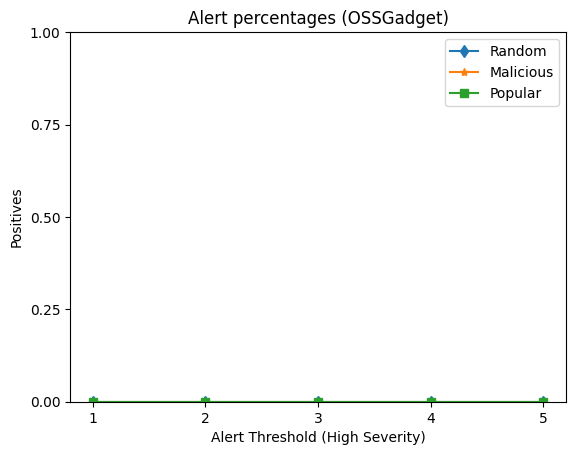

In [104]:
random_slice = df[(df['scanner'] == 'ossgadget') & (df['source'] == 'random')]
benign_slice = df[(df['scanner'] == 'ossgadget') & ((df['source'] == 'dependents') | (df['source'] == 'downloaded'))]
malicious_slice = df[(df['scanner'] == 'ossgadget') & df['malicious']]

x = [1, 2, 3, 4, 5]

# Calculate percentages for each category
y_random_all = [
    len(random_slice[random_slice['severity_high'] > i]) / len(random_slice)
    for i in x
]

y_malicious_all = [
    len(malicious_slice[malicious_slice['severity_high'] > i]) / len(malicious_slice)
    for i in x
]

y_benign_all = [
    len(benign_slice[benign_slice['severity_high'] > i]) / len(benign_slice)
    for i in x
]

# Plotting
plt.plot(x, y_random_all, 'd-', label='Random')
plt.plot(x, y_malicious_all, '*-', label='Malicious')
plt.plot(x, y_benign_all, 's-', label='Popular')

# Adding labels and title
plt.xlabel('Alert Threshold (High Severity)')
plt.ylabel('Positives')
plt.title('Alert percentages (OSSGadget)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

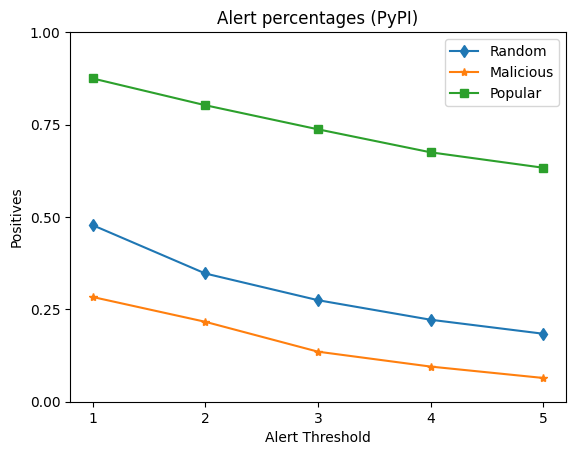

In [105]:
random_slice = df[(df['scanner'] == 'pypi') & (df['source'] == 'random')]
benign_slice = df[(df['scanner'] == 'pypi') & ((df['source'] == 'dependents') | (df['source'] == 'downloaded'))]
malicious_slice = df[(df['scanner'] == 'pypi') & df['malicious']]

x = [1, 2, 3, 4, 5]

# Calculate percentages for each category
y_random_all = [
    len(random_slice[random_slice['total_alert'] > i]) / len(random_slice)
    for i in x
]

y_malicious_all = [
    len(malicious_slice[malicious_slice['total_alert'] > i]) / len(malicious_slice)
    for i in x
]

y_benign_all = [
    len(benign_slice[benign_slice['total_alert'] > i]) / len(benign_slice)
    for i in x
]

# Plotting
plt.plot(x, y_random_all, 'd-', label='Random')
plt.plot(x, y_malicious_all, '*-', label='Malicious')
plt.plot(x, y_benign_all, 's-', label='Popular')

# Adding labels and title
plt.xlabel('Alert Threshold')
plt.ylabel('Positives')
plt.title('Alert percentages (PyPI)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

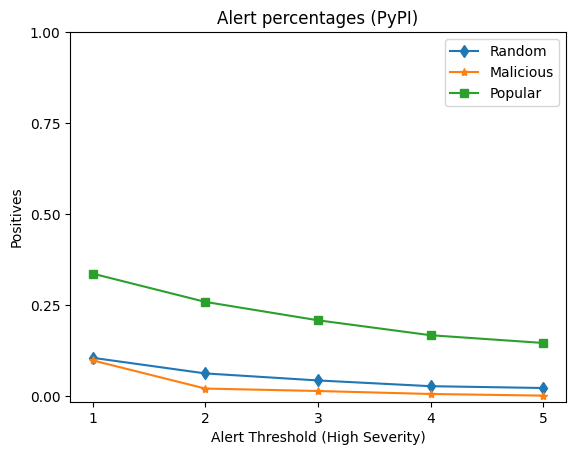

In [106]:
random_slice = df[(df['scanner'] == 'pypi') & (df['source'] == 'random')]
benign_slice = df[(df['scanner'] == 'pypi') & ((df['source'] == 'dependents') | (df['source'] == 'downloaded'))]
malicious_slice = df[(df['scanner'] == 'pypi') & df['malicious']]

x = [1, 2, 3, 4, 5]

# Calculate percentages for each category
y_random_all = [
    len(random_slice[random_slice['severity_high'] > i]) / len(random_slice)
    for i in x
]

y_malicious_all = [
    len(malicious_slice[malicious_slice['severity_high'] > i]) / len(malicious_slice)
    for i in x
]

y_benign_all = [
    len(benign_slice[benign_slice['severity_high'] > i]) / len(benign_slice)
    for i in x
]

# Plotting
plt.plot(x, y_random_all, 'd-', label='Random')
plt.plot(x, y_malicious_all, '*-', label='Malicious')
plt.plot(x, y_benign_all, 's-', label='Popular')

# Adding labels and title
plt.xlabel('Alert Threshold (High Severity)')
plt.ylabel('Positives')
plt.title('Alert percentages (PyPI)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xticks([1, 2, 3, 4, 5])
plt.legend()
plt.show()

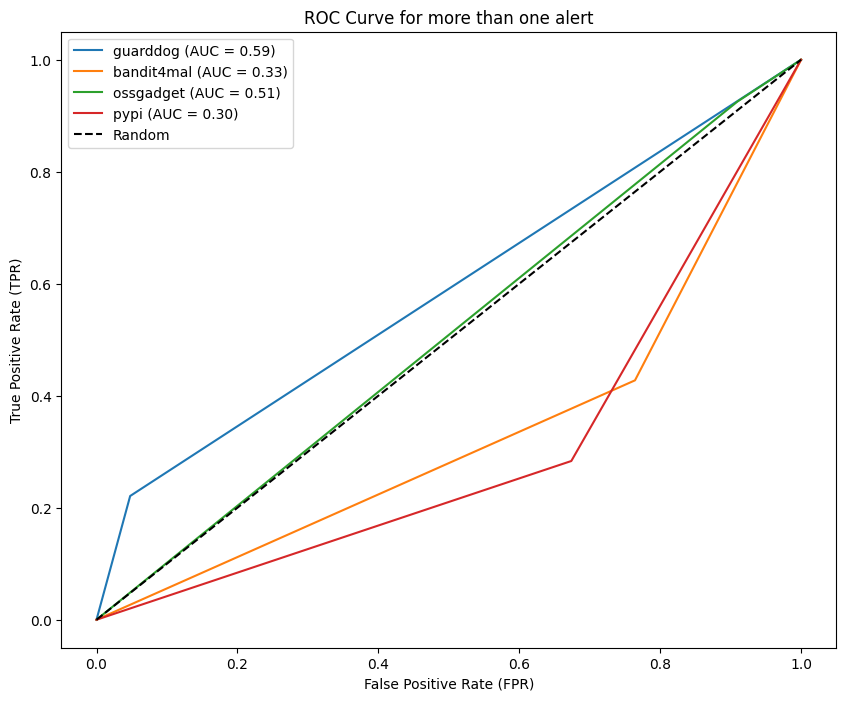

In [118]:
from sklearn.metrics import roc_curve, auc
# Assuming df is your DataFrame

# Define the scanners you want to analyze
scanners = ['guarddog', 'bandit4mal', 'ossgadget', 'pypi']

# Initialize an empty DataFrame to store the results
scanner_list, fpr_list, tpr_list, auc_list = [], [], [], []

# Loop through each scanner and calculate ROC AUC
for scanner in scanners:
    y_true = df[df['scanner'] == scanner].malicious
    y_scores = (df[df['scanner'] == scanner].total_alert > 1)

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Store the results in the DataFrame
    scanner_list.append(scanner)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

roc_results = pd.DataFrame({'Scanner': scanner_list, 'FPR': fpr_list, 'TPR': tpr_list, 'AUC': auc_list})

# Plot ROC curves
plt.figure(figsize=(10, 8))
for index, row in roc_results.iterrows():
    plt.plot(row['FPR'], row['TPR'], label=f"{row['Scanner']} (AUC = {row['AUC']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for more than one alert')
plt.legend()

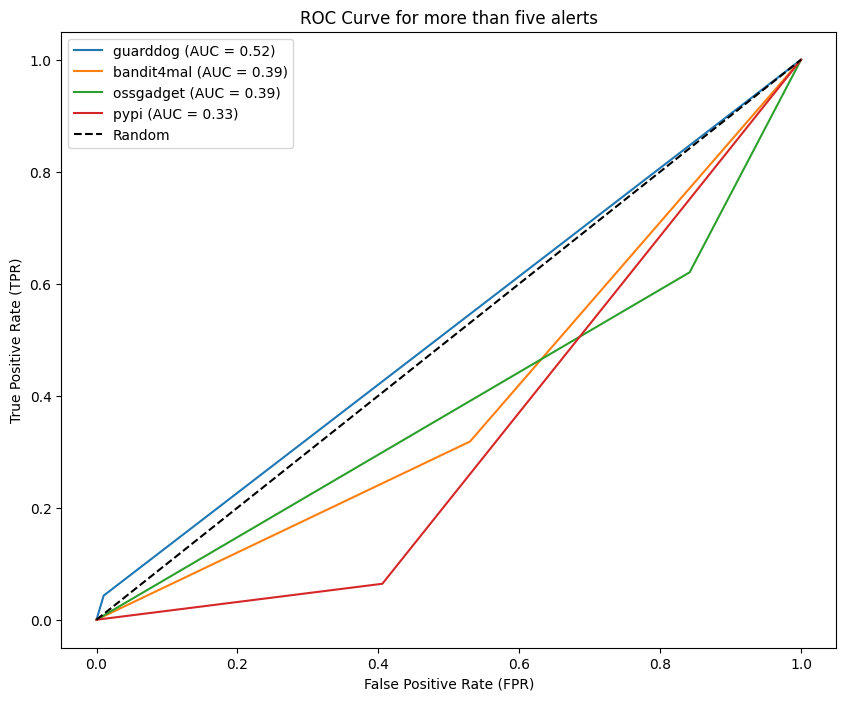

In [122]:
from sklearn.metrics import roc_curve, auc
# Assuming df is your DataFrame

# Define the scanners you want to analyze
scanners = ['guarddog', 'bandit4mal', 'ossgadget', 'pypi']

# Initialize an empty DataFrame to store the results
scanner_list, fpr_list, tpr_list, auc_list = [], [], [], []

# Loop through each scanner and calculate ROC AUC
for scanner in scanners:
    y_true = df[df['scanner'] == scanner].malicious
    y_scores = (df[df['scanner'] == scanner].total_alert > 5)

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Store the results in the DataFrame
    scanner_list.append(scanner)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

roc_results = pd.DataFrame({'Scanner': scanner_list, 'FPR': fpr_list, 'TPR': tpr_list, 'AUC': auc_list})

# Plot ROC curves
plt.figure(figsize=(10, 8))
for index, row in roc_results.iterrows():
    plt.plot(row['FPR'], row['TPR'], label=f"{row['Scanner']} (AUC = {row['AUC']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for more than five alerts')
plt.legend()

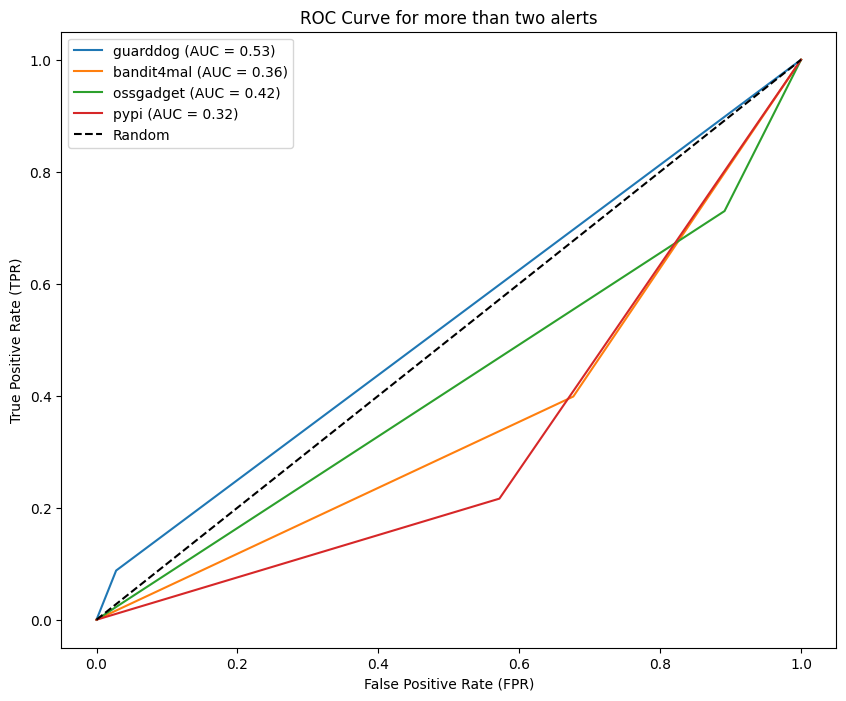

In [123]:
from sklearn.metrics import roc_curve, auc
# Assuming df is your DataFrame

# Define the scanners you want to analyze
scanners = ['guarddog', 'bandit4mal', 'ossgadget', 'pypi']

# Initialize an empty DataFrame to store the results
scanner_list, fpr_list, tpr_list, auc_list = [], [], [], []

# Loop through each scanner and calculate ROC AUC
for scanner in scanners:
    y_true = df[df['scanner'] == scanner].malicious
    y_scores = (df[df['scanner'] == scanner].total_alert > 2)

    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    # Store the results in the DataFrame
    scanner_list.append(scanner)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

roc_results = pd.DataFrame({'Scanner': scanner_list, 'FPR': fpr_list, 'TPR': tpr_list, 'AUC': auc_list})

# Plot ROC curves
plt.figure(figsize=(10, 8))
for index, row in roc_results.iterrows():
    plt.plot(row['FPR'], row['TPR'], label=f"{row['Scanner']} (AUC = {row['AUC']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for more than two alerts')
plt.legend()